## Install and import

In [4]:
import os
os.system("pip3 install -r requirements.txt")
from datamodel import OrderDepth, UserId, TradingState, Order, Listing, Observation, ConversionObservation
from typing import List, Dict, Tuple
import pandas as pd
import json
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tools

### Log Scraper

In [132]:
def log_to_json(logname: str) -> Dict:
    with open(logname, "r") as f:
        content = f.read() 
    content = content.split("Trade History:")[1]
    content = json.loads(content)
    return content

all_trades = log_to_json(input(""))
all_trades

[{'timestamp': 0,
  'buyer': '',
  'seller': '',
  'symbol': 'AMETHYSTS',
  'currency': 'SEASHELLS',
  'price': 10004,
  'quantity': 1},
 {'timestamp': 0,
  'buyer': '',
  'seller': '',
  'symbol': 'STARFRUIT',
  'currency': 'SEASHELLS',
  'price': 5003,
  'quantity': 1},
 {'timestamp': 0,
  'buyer': '',
  'seller': '',
  'symbol': 'STARFRUIT',
  'currency': 'SEASHELLS',
  'price': 5003,
  'quantity': 13},
 {'timestamp': 1100,
  'buyer': '',
  'seller': '',
  'symbol': 'AMETHYSTS',
  'currency': 'SEASHELLS',
  'price': 9996,
  'quantity': 2},
 {'timestamp': 1700,
  'buyer': '',
  'seller': '',
  'symbol': 'STARFRUIT',
  'currency': 'SEASHELLS',
  'price': 5002,
  'quantity': 8},
 {'timestamp': 1700,
  'buyer': '',
  'seller': '',
  'symbol': 'AMETHYSTS',
  'currency': 'SEASHELLS',
  'price': 10002,
  'quantity': 1},
 {'timestamp': 1800,
  'buyer': '',
  'seller': '',
  'symbol': 'AMETHYSTS',
  'currency': 'SEASHELLS',
  'price': 10002,
  'quantity': 1},
 {'timestamp': 1900,
  'buyer': 

## Fake State Generator

In [6]:
def generate_random_state(product1_name: str, product2_name: str) -> TradingState:
    timestamp = random.randint(0, 1999) * 100
    traderData = ""

    listings = {
        product1_name: Listing(symbol=product1_name, product=product1_name, denomination="SEASHELLS"),
        product2_name: Listing(symbol=product2_name, product=product2_name, denomination="SEASHELLS"),
    }

    order_depths = {
        product1_name: OrderDepth(),
        product2_name: OrderDepth(),
    }

    # Generate random buy and sell orders for both products
    for product_name in [product1_name, product2_name]:
        order_depths[product_name].buy_orders = {price: quantity for price, quantity in zip(range(100, 105), random.sample(range(1, 10), 5))}
        order_depths[product_name].sell_orders = {price: -quantity for price, quantity in zip(range(106, 111), random.sample(range(1, 10), 5))}

    # Assuming no trades have occurred yet
    own_trades = {product1_name: [], product2_name: []}
    market_trades = {product1_name: [], product2_name: []}

    # Random initial positions for both products
    position = {
        product1_name: random.randint(-10, 10),
        product2_name: random.randint(-10, 10),
    }

    # Placeholder for observations with default values
    plainValueObservations = {product1_name: 0, product2_name: 0}
    conversionObservations = {product1_name: ConversionObservation(0, 0, 0, 0, 0, 0, 0),
                              product2_name: ConversionObservation(0, 0, 0, 0, 0, 0, 0)}

    observations = Observation(plainValueObservations=plainValueObservations, conversionObservations=conversionObservations)

    return TradingState(traderData, timestamp, listings, order_depths, own_trades, market_trades, position, observations)



## Sell Possible?

In [131]:
def can_sell(product: str, state: TradingState):
    print(state.position)
    return len(state.order_depths[product].buy_orders) > 0 and state.position[product]  > -10
    
can_sell("STARFRUIT", generate_random_state("STARFRUIT", "SEASHELLS"))


{'STARFRUIT': 1, 'SEASHELLS': -9}


True

## Visualizations

   timestamp buyer seller     symbol   currency  price  quantity
0          0               AMETHYSTS  SEASHELLS  10004         1
1       1100               AMETHYSTS  SEASHELLS   9996         2
2       1700               AMETHYSTS  SEASHELLS  10002         1
3       1800               AMETHYSTS  SEASHELLS  10002         1
4       2000               AMETHYSTS  SEASHELLS   9998         1


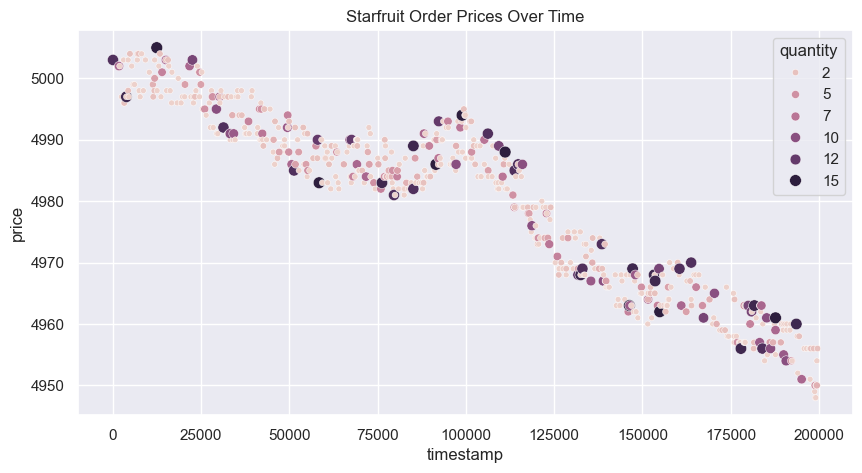

In [139]:
orders = pd.DataFrame(all_trades) # all trades is a list of dicts. the dicts are trades
orders['timestamp'] = pd.to_datetime(orders['timestamp'], unit='ms')

startfruit_orders = pd.DataFrame([order for order in all_trades if order['symbol'] == 'STARFRUIT'])
amethyst_orders = pd.DataFrame([order for order in all_trades if order['symbol'] == 'AMETHYSTS'])

print(amethyst_orders.head())
amethyst_orders.to_csv('data/test/amethyst_orders.csv')

def starfruit_graph():
    g = sns.scatterplot(data=startfruit_orders, x='timestamp', y='price', size='quantity', hue='quantity')
    g.set_title('Starfruit Order Prices Over Time')
    g

def amethyst_graph(): # amethyst price is extremely stable
    g = sns.lineplot(data=amethyst_orders, x='timestamp', y='price')
    g.set_title('Amethyst Order Prices Over Time')
    g

starfruit_graph()

